In [247]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [248]:
import warnings
warnings.filterwarnings("ignore")

In [249]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [250]:
print("Size of the data : ", df.shape)

Size of the data :  (21613, 21)


### Data Preparation

#### 1. Dropping the irrelavant feature - id

In [251]:
df = df.drop("id",axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 2. Deriving the house age and age after renovation 

In [252]:
#extracting the year from the date column
df['yr']=df['date'].astype(str).str[:4]
#deriving the house age
df['age']=df['yr'].astype(int)-df['yr_built']

In [253]:
#extracting house age after renovation
df['age_rnv']=0
df['age_rnv']=df['yr'][df['yr_renovated']!=0].astype(int)-df['yr_renovated'][df['yr_renovated']!=0]
df['age_rnv'][df['age_rnv'].isnull()]=0

In [254]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr,age,age_rnv
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


#### 3. Dropping the additional features 

In [255]:
df = df.drop(["date", "yr_built", "yr_renovated", "yr"],axis =1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_rnv
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0.0


#### correlation

In [256]:
print("==============Correlation of price with other features=================")
df.corr().loc["price"][1:].sort_values(ascending = False).index

==============Correlation of price with other features=================


Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors',
       'sqft_lot', 'sqft_lot15', 'age_rnv', 'condition', 'long', 'zipcode',
       'age'],
      dtype='object')

In [257]:
# independent and dependent features 
X = df.drop("price",axis=1)
y = df["price"]

### Train-Test Split

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,random_state=3)
print("Training data size : ", X_train.shape)
print("Test data size : ", X_test.shape)

Training data size :  (16209, 18)
Test data size :  (5404, 18)


### Simple Linear Regression

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
simple_lr = LinearRegression()
simple_lr.fit(X_train[["sqft_living"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
# predictions
y_pred = simple_lr.predict(X_test[["sqft_living"]]) 
y_pred

array([ 404785.59940785, 1220687.94257837,  850587.91062473, ...,
        323475.74390288,  292634.07457341,  522544.70048401])

#### Evaluating the model

In [263]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [264]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of simple linear regression model : ", rmse)

RMSE of simple linear regression model :  258870.72627950888


In [265]:
r_squared = r2_score(y_test, y_pred)
print("R-squared of simple linear regression model : ", r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("\nAdjusted R-squared of simple linear regression model : ", adjusted_r_squared)

R-squared of simple linear regression model :  0.49753871219817647

Adjusted R-squared of simple linear regression model :  0.4958591758601203


In [266]:
reg_algos = pd.DataFrame({'Model': [],
                           'Features used':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared':[],
                           'Adjusted R-squared':[],
                           })

In [267]:
model_count = reg_algos.shape[0]
reg_algos.loc[model_count] = ["Simple Linear Regression", "Single feature", rmse, r_squared, adjusted_r_squared]
reg_algos

,Model,Features used,Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared
0,Simple Linear Regression,Single feature,258870.72628,0.497539,0.495859


### Multiple linear regression models

#### Model 1 - Using subset of features  

In [268]:
#taking few highly correlated features
multiple_1 = LinearRegression()
multiple_1.fit(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [269]:
y_pred = multiple_1.predict(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms']]) 
y_pred

array([ 487096.20293576, 1094578.13359982,  812106.80718381, ...,
        308335.19219357,  310763.76934201,  403332.34649045])

In [270]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Model 1 using a subset of features : ", rmse)

RMSE of Model 1 using a subset of features :  235580.07102233206


In [271]:
r_squared = r2_score(y_test, y_pred)
print("R-squared of Model 1 using a subset of features : ", r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("\nAdjusted R-squared of Model 1 using a subset of features : ", adjusted_r_squared)

R-squared of Model 1 using a subset of features :  0.5838845706121092

Adjusted R-squared of Model 1 using a subset of features :  0.5824936555278043


In [272]:
model_count = reg_algos.shape[0]
reg_algos.loc[model_count] = ["Multiple Linear Regression", "Subset of features", rmse, r_squared, adjusted_r_squared]
reg_algos

,Model,Features used,Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared
0,Simple Linear Regression,Single feature,258870.726280,0.497539,0.495859
1,Multiple Linear Regression,Subset of features,235580.071022,0.583885,0.582494


#### Model 2 - Using all the features 

In [273]:
multiple_with_all = LinearRegression()
multiple_with_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
y_pred = multiple_with_all.predict(X_test) 
y_pred

array([ 543286.31336494, 1257511.77000432,  765837.7736039 , ...,
        123637.81361283,  276938.24289176,  469212.78960208])

In [275]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Model 2 using all the features : ", rmse)

RMSE of Model 2 using all the features :  197253.2514891746


In [276]:
r_squared = r2_score(y_test, y_pred)
print("R-squared of Model 2 using all the features : ", r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("\nAdjusted R-squared of Model 2 using all the features : ", adjusted_r_squared)

R-squared of Model 2 using all the features :  0.7082673316343386

Adjusted R-squared of Model 2 using all the features :  0.7072921806537291


In [277]:
model_count = reg_algos.shape[0]
reg_algos.loc[model_count] = ["Multiple Linear Regression", "All features", rmse, r_squared, adjusted_r_squared]
reg_algos

,Model,Features used,Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared
0,Simple Linear Regression,Single feature,258870.726280,0.497539,0.495859
1,Multiple Linear Regression,Subset of features,235580.071022,0.583885,0.582494
2,Multiple Linear Regression,All features,197253.251489,0.708267,0.707292


### Feature Selection

#### 1. Forward Selection

In [278]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [279]:
sfs = SFS(LinearRegression(),
          k_features=(3,18),
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [280]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=(3, 18), n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

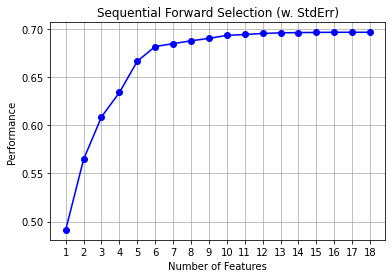

In [281]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [283]:
sfs = SFS(LinearRegression(),
          k_features=14,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [284]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=14, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [285]:
sfs.k_feature_names_ 

('bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age')

#### Model 3 - Using all the selected features 

In [286]:
multiple_with_selected = LinearRegression()
multiple_with_selected.fit(X_train[['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
y_pred = multiple_with_selected.predict(X_test[['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age']]) 
y_pred

array([ 547845.87229595, 1263717.53465397,  766357.79047048, ...,
        130581.49090276,  279560.94999563,  466535.82218082])

In [288]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Model 3 using all the selected features : ", rmse)

RMSE of Model 3 using all the selected features :  197145.02875547716


In [289]:
r_squared = r2_score(y_test, y_pred)
print("R-squared of Model 3 using all the selected features : ", r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("\nAdjusted R-squared of Model 2 using all the  selectedfeatures : ", adjusted_r_squared)

R-squared of Model 3 using all the selected features :  0.7085873612981732

Adjusted R-squared of Model 2 using all the  selectedfeatures :  0.7076132800546017


In [290]:
model_count = reg_algos.shape[0]
reg_algos.loc[model_count] = ["Multiple Linear Regression", "Selected features", rmse, r_squared, adjusted_r_squared]
reg_algos

,Model,Features used,Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared
0,Simple Linear Regression,Single feature,258870.726280,0.497539,0.495859
1,Multiple Linear Regression,Subset of features,235580.071022,0.583885,0.582494
2,Multiple Linear Regression,All features,197253.251489,0.708267,0.707292
3,Multiple Linear Regression,Selected features,197145.028755,0.708587,0.707613


### Polynomial regression models

#### Model 1 - with degree = 2 

In [149]:
from sklearn.preprocessing import PolynomialFeatures

In [150]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(X_train)
X_testpoly = polyfeat.fit_transform(X_test)

In [151]:
poly_reg = LinearRegression()
poly_reg.fit(X_trainpoly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
X_trainpoly.shape[1]

190

In [153]:
X_testpoly.shape[1]

190

In [154]:
y_pred = poly_reg.predict(X_testpoly) 
y_pred

array([ 422093.56567383, 1581832.66942978,  666127.28995514, ...,
        305898.05573654,  358561.0961113 ,  485817.22528458])

In [155]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Model 1 with degree 2 : ", rmse)

RMSE of Model 1 with degree 2 :  155662.3518117337


In [156]:
r_squared = r2_score(y_test, y_pred)
print("R-squared of Model 1 with degree 2 : ", r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("\nAdjusted R-squared of Model 1 with degree 2 : ", adjusted_r_squared)

R-squared of Model 1 with degree 2 :  0.8183213483201017

Adjusted R-squared of Model 1 with degree 2 :  0.8177140659189432


In [157]:
model_count = reg_algos.shape[0]
reg_algos.loc[model_count] = ["Polynomial Regression", "Selected features", rmse, r_squared, adjusted_r_squared]
reg_algos

,Model,Features used,Root Mean Squared Error (RMSE),R-squared,Adjusted R-squared
0,Simple Linear Regression,Single feature,258870.726280,0.497539,0.495859
1,Multiple Linear Regression,Subset of features,235580.071022,0.583885,0.582494
2,Multiple Linear Regression,All features,197253.251489,0.708267,0.707292
3,Multiple Linear Regression,Selected features,197253.251489,0.708267,0.707292
4,Polynomial Regression,Selected features,155662.351812,0.818321,0.817714
